# Задание 1

## 1)Состоятельность оценок

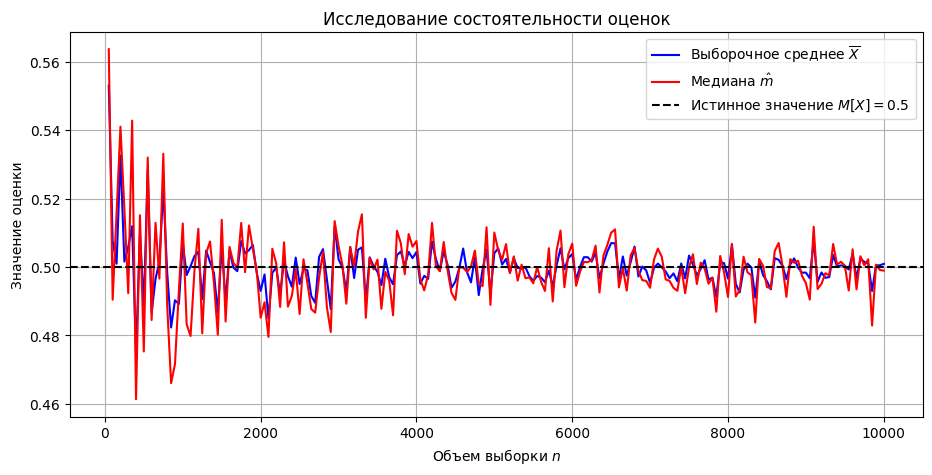

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

def cons_exp():
    n_val = np.arange(50,10001,50) 
    mean_est = [] 
    median_est = [] 
    for n in n_val:
        sample = np.random.uniform(0,1,n)  
        mean_est.append(np.mean(sample))  
        median_est.append(np.median(sample)) 

    plt.figure(figsize=(11,5))
    plt.plot(n_val,mean_est,label=r'Выборочное среднее $\overline{X}$',color='blue')
    plt.plot(n_val,median_est,label=r'Медиана $\hat{m}$',color='red')
    plt.axhline(0.5,color='black',linestyle='--',label='Истинное значение $M[X]=0.5$')
    plt.xlabel('Объем выборки $n$')
    plt.ylabel('Значение оценки')
    plt.title('Исследование состоятельности оценок')
    plt.legend()
    plt.grid()
    plt.show()
cons_exp()

## 2)Несмещенность оценок

Среднее значение выборочного среднего: 0.4998336422496669
Среднее значение медианы: 0.4996958711174381


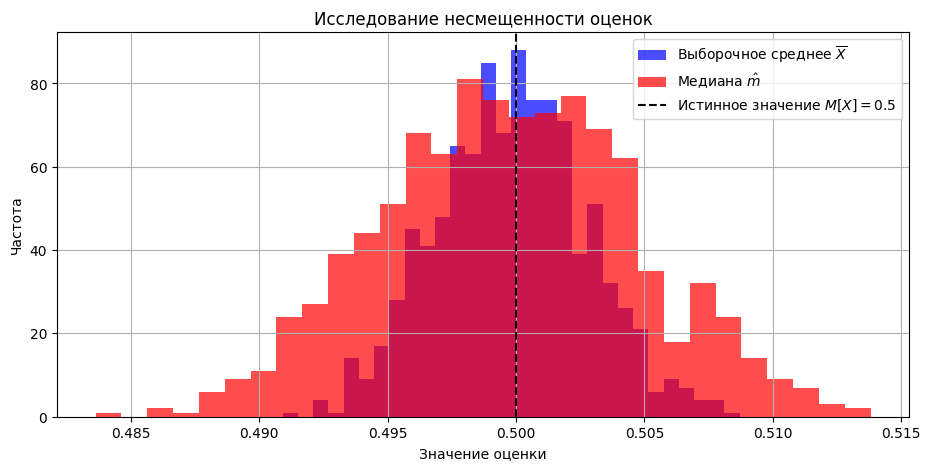

In [3]:
def unb_exp():
    n = 10000  
    N = 1000  
    mean_val = []  
    median_val = []  
    for _ in range(N):
        sample = np.random.uniform(0,1,n)  
        mean_val.append(np.mean(sample))  
        median_val.append(np.median(sample))  

    #средние значения оценок
    mean_of_means = np.mean(mean_val)
    mean_of_medians = np.mean(median_val)
    print(f"Среднее значение выборочного среднего: {mean_of_means}")
    print(f"Среднее значение медианы: {mean_of_medians}")

    plt.figure(figsize=(11,5))
    plt.hist(mean_val,bins=30,alpha=0.7,label=r'Выборочное среднее $\overline{X}$',color='blue')
    plt.hist(median_val,bins=30,alpha=0.7,label=r'Медиана $\hat{m}$',color='red')
    plt.axvline(0.5,color='black',linestyle='--',label='Истинное значение $M[X]=0.5$')
    plt.xlabel('Значение оценки')
    plt.ylabel('Частота')
    plt.title('Исследование несмещенности оценок')
    plt.legend()
    plt.grid()
    plt.show()
unb_exp()

## 3)Сравнительная эффективность оценок

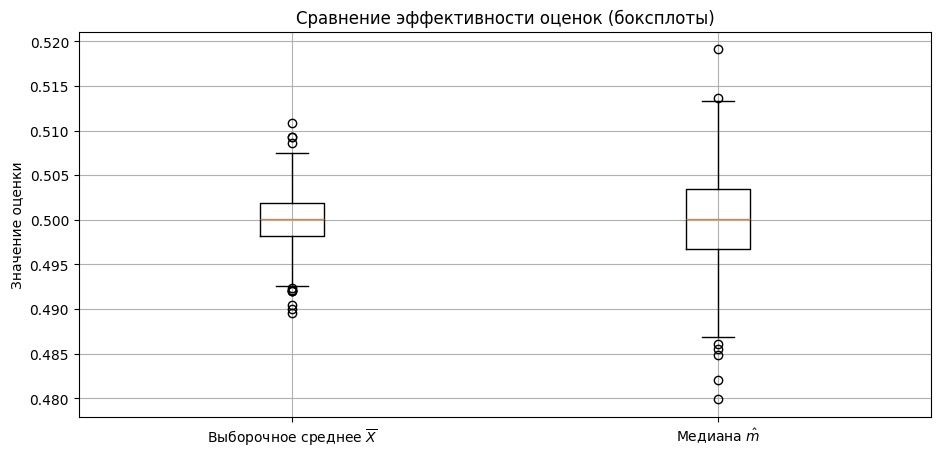

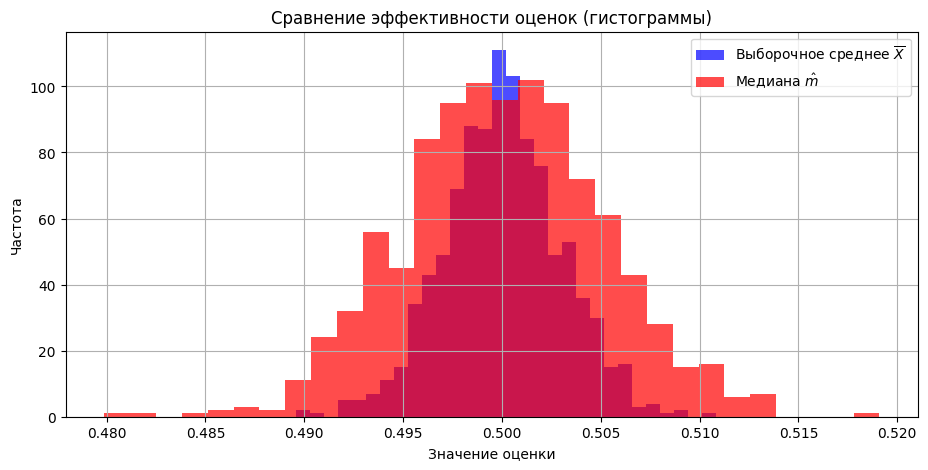

Дисперсия выборочного среднего: 8.728725160560096e-06
Дисперсия медианы: 2.5238691447084008e-05


In [6]:
def eff_exp():
    n = 10000  
    N = 1000  
    mean_val = []  
    median_val = []  
    for _ in range(N):
        sample = np.random.uniform(0,1,n)  
        mean_val.append(np.mean(sample))  
        median_val.append(np.median(sample))

    #боксплоты
    plt.figure(figsize=(11,5))
    plt.boxplot([mean_val,median_val],tick_labels=[r'Выборочное среднее $\overline{X}$',r'Медиана $\hat{m}$'])
    plt.title('Сравнение эффективности оценок (боксплоты)')
    plt.ylabel('Значение оценки')
    plt.grid()
    plt.show()

    #гистограммы
    plt.figure(figsize=(11,5))
    plt.hist(mean_val,bins=30,alpha=0.7,label=r'Выборочное среднее $\overline{X}$',color='blue')
    plt.hist(median_val,bins=30,alpha=0.7,label=r'Медиана $\hat{m}$',color='red')
    plt.xlabel('Значение оценки')
    plt.ylabel('Частота')
    plt.title('Сравнение эффективности оценок (гистограммы)')
    plt.legend()
    plt.grid()
    plt.show()

    #дисперсии
    var_mean = np.var(mean_val)
    var_median = np.var(median_val)
    print(f"Дисперсия выборочного среднего: {var_mean}")
    print(f"Дисперсия медианы: {var_median}")
eff_exp()

# Задание 2

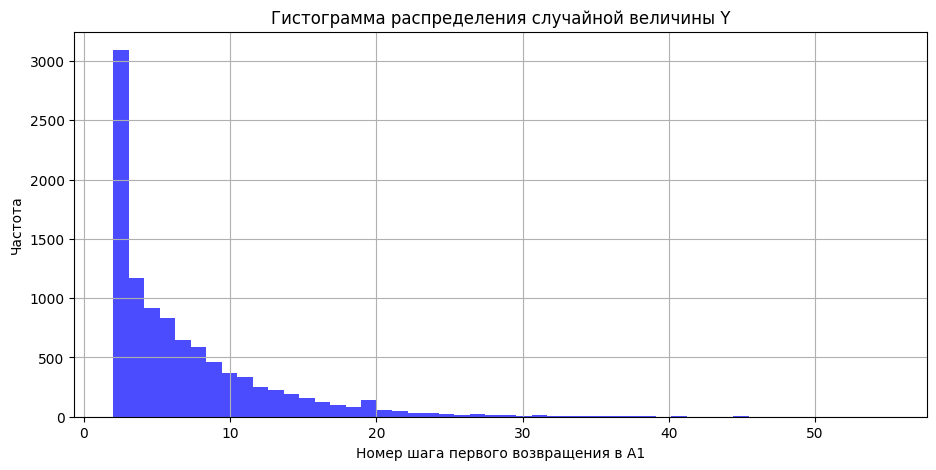

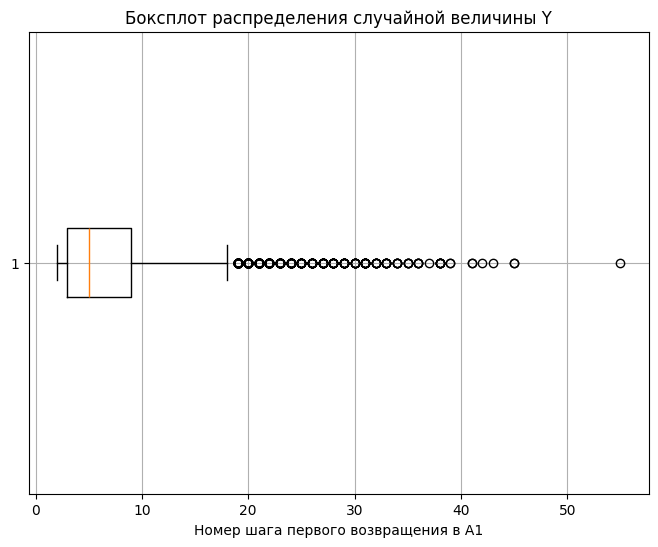

Математическое ожидание: 6.9762
Медиана: 5.0
Дисперсия: 29.97263356
Коэффициент асимметрии: 2.001644802769231
Коэффициент эксцесса: 5.707179878731349


In [8]:
N = 10000  
v = 7 
start_v = 0  

def mod():
    current_v = start_v
    steps = 0 
    while True:
        steps += 1
        next_v = np.random.choice([v for v in range(v) if v != current_v])
        if next_v == start_v:
            return steps
        current_v = next_v

Y_sam = [mod() for _ in range(N)] #выборка значений Y

#гистограмма
plt.figure(figsize=(11,5))
plt.hist(Y_sam,bins=50,color='blue',alpha=0.7)
plt.title('Гистограмма распределения случайной величины Y')
plt.xlabel('Номер шага первого возвращения в A1')
plt.ylabel('Частота')
plt.grid()
plt.show()

#боксплот
plt.figure(figsize=(8,6))
plt.boxplot(Y_sam,vert=False)
plt.title('Боксплот распределения случайной величины Y')
plt.xlabel('Номер шага первого возвращения в A1')
plt.grid()
plt.show()

#характеристики
M_Y = np.mean(Y_sam)  
median_Y = np.median(Y_sam)
D_Y = np.var(Y_sam)  
skew_Y = skew(Y_sam) 
kurtosis_Y = kurtosis(Y_sam) 
print(f'Математическое ожидание: {M_Y}')
print(f'Медиана: {median_Y}')
print(f'Дисперсия: {D_Y}')
print(f'Коэффициент асимметрии: {skew_Y}')
print(f'Коэффициент эксцесса: {kurtosis_Y}')